In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
cd ..

/Users/alphonsowoodbury/DS/mod2project/flatiron_mod2_project_kch


In [3]:
df = pd.read_csv('kc_cleaned.csv')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,has_waterfront,has_basement,has_renovation,eff_built
0,221900.0,3,1,1180.0,5650.0,1,0,3,7,98178,47.5112,-122.257,1340.0,5650.0,0,0,0,65
1,538000.0,3,2,2570.0,7242.0,2,0,3,7,98125,47.7210,-122.319,1690.0,7639.0,0,1,1,29
2,180000.0,2,1,770.0,10000.0,1,0,3,6,98028,47.7379,-122.233,2720.0,8062.0,0,0,0,87
3,604000.0,4,3,1960.0,5000.0,1,0,5,7,98136,47.5208,-122.393,1360.0,5000.0,0,1,0,55
4,510000.0,3,2,1680.0,8080.0,1,0,3,8,98074,47.6168,-122.045,1800.0,7503.0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530.0,1131.0,3,0,3,8,98103,47.6993,-122.346,1530.0,1509.0,0,0,0,11
21593,400000.0,4,2,2310.0,5813.0,2,0,3,8,98146,47.5107,-122.362,1830.0,7200.0,0,0,0,6
21594,402101.0,2,0,1020.0,1350.0,2,0,3,7,98144,47.5944,-122.299,1020.0,2007.0,0,0,0,11
21595,400000.0,3,2,1600.0,2388.0,2,0,3,8,98027,47.5345,-122.069,1410.0,1287.0,0,0,0,16


In [4]:
mybins = range(0, df.eff_built.max(), 25)
df['age_bucket'] = pd.cut(df.eff_built, bins=mybins)
df['age_bucket'].value_counts()

(0, 25]      6240
(25, 50]     5938
(50, 75]     5807
(75, 100]    2335
Name: age_bucket, dtype: int64

#### price by age*

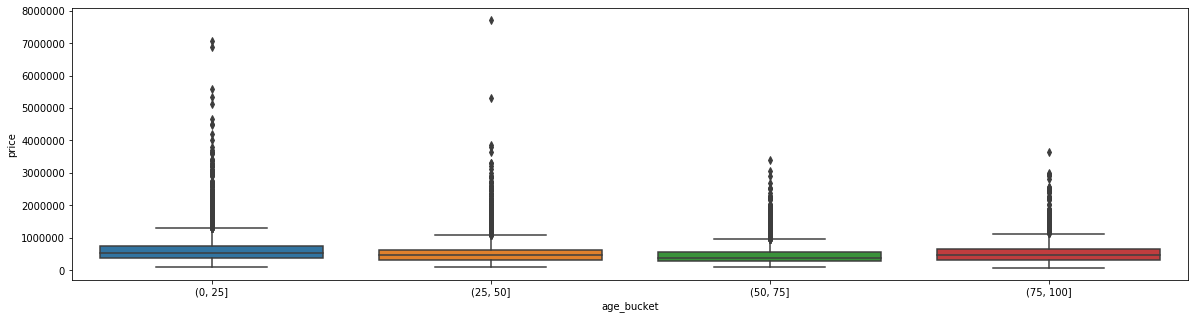

In [5]:
plt.figure(figsize=(20,5))
sns.boxplot(df.age_bucket,df.price)

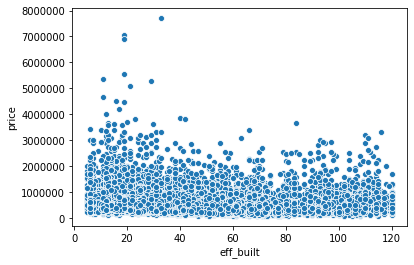

In [6]:
sns.scatterplot(df.eff_built,df.price)

In [7]:
df.age_bucket.describe()

count       20320
unique          4
top       (0, 25]
freq         6240
Name: age_bucket, dtype: object

(array([3878., 2839., 2929., 2532., 3152., 2445., 1251.,  981.,  840.,
         750.]),
 array([  5. ,  16.5,  28. ,  39.5,  51. ,  62.5,  74. ,  85.5,  97. ,
        108.5, 120. ]),
 <a list of 10 Patch objects>)

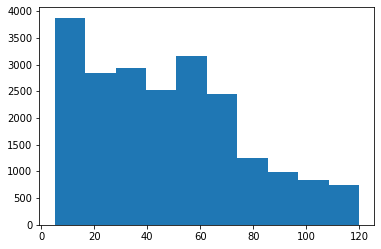

In [8]:
plt.hist(df.eff_built)

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


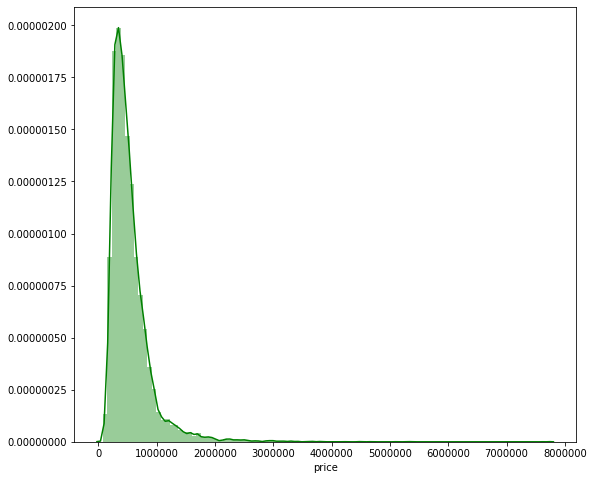

In [9]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### price by zip

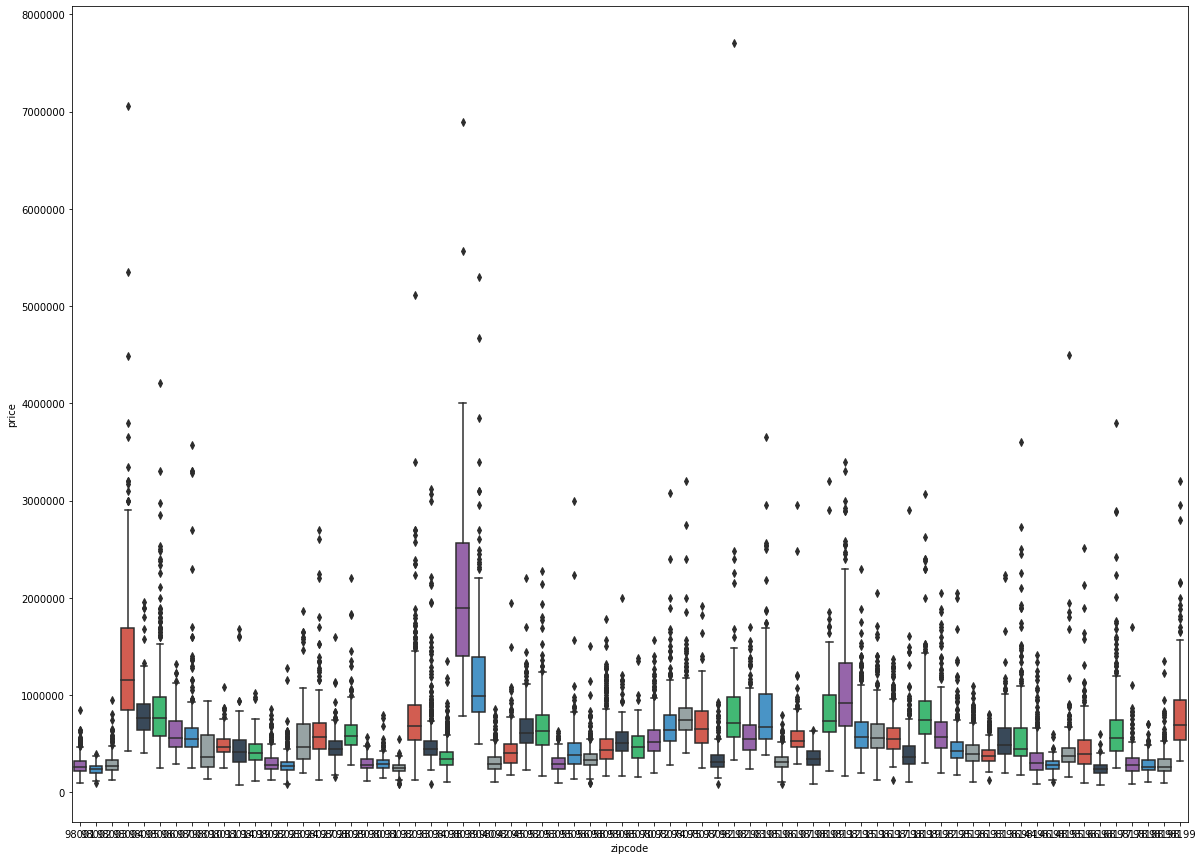

In [21]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


plt.figure(figsize=(20,15))

sns.boxplot(df.zipcode,df.price,palette=flatui)
#f-test?

#### price by condition, grade

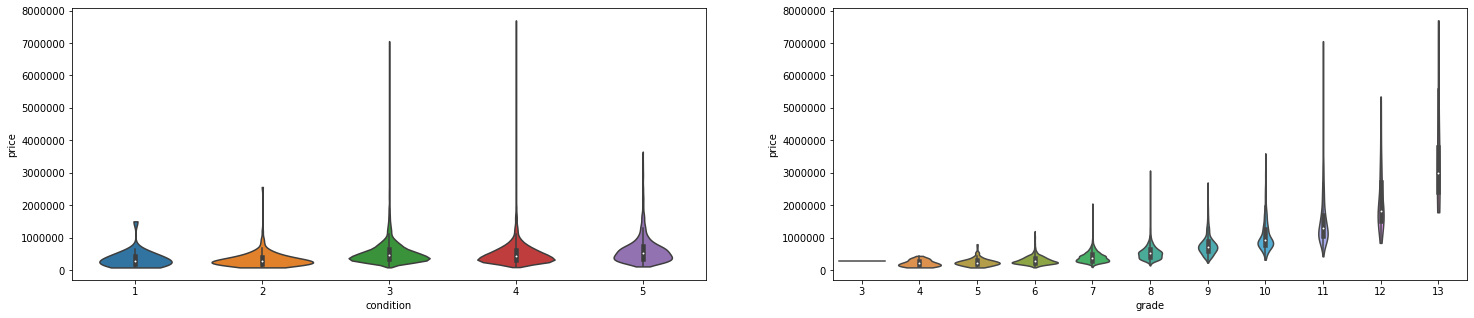

In [11]:
f, axes = plt.subplots(1, 2,figsize=(25,5))
#plt.figure(figsize=(15,30))
sns.violinplot(  y="price", x= "condition", data=df,  orient='v' , ax=axes[0],cut=0)
sns.violinplot(  y="price", x= "grade", data=df,  orient='v' , ax=axes[1],cut=0)

#### price by reno, basement, waterfront

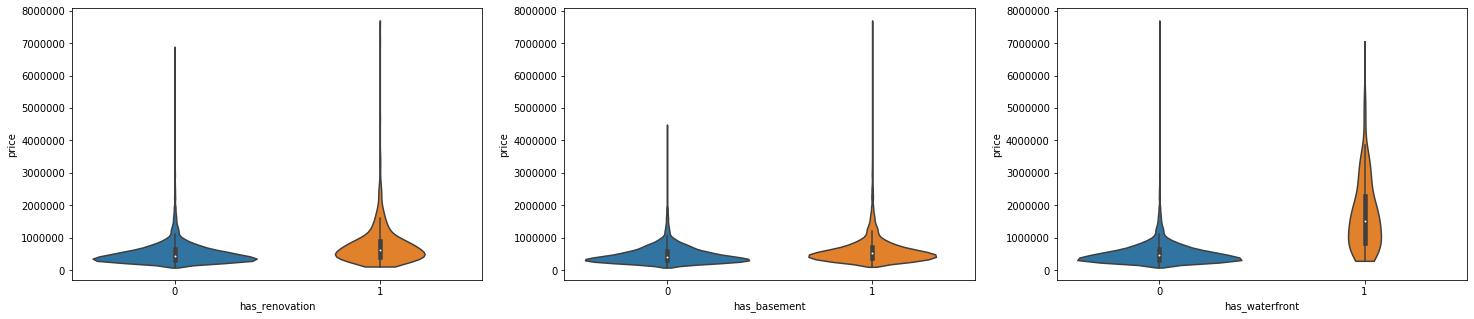

In [12]:
f, axes = plt.subplots(1, 3,figsize=(25,5))
#plt.figure(figsize=(15,30))
sns.violinplot(df.has_renovation,df.price, ax=axes[0], cut=0) #ztest
sns.violinplot(df.has_basement,df.price, ax=axes[1], cut=0) #ztest
sns.violinplot(df.has_waterfront,df.price, ax=axes[2], cut=0) #ztest

#### price by bedrooms, bathrooms

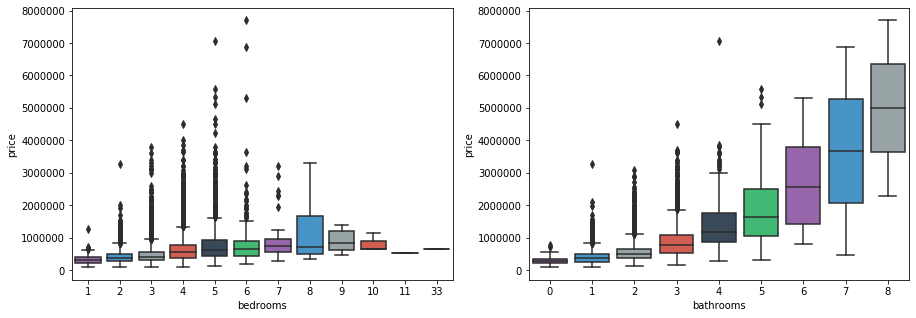

In [20]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
f, axes = plt.subplots(1, 2,figsize=(15,5))
#plt.figure(figsize=(15,30))
sns.boxplot(  y="price", x= "bedrooms", data=df,  orient='v' , ax=axes[0],palette=flatui)
sns.boxplot(  y="price", x= "bathrooms", data=df,  orient='v' , ax=axes[1],palette=flatui)


# how to assess?

#### View

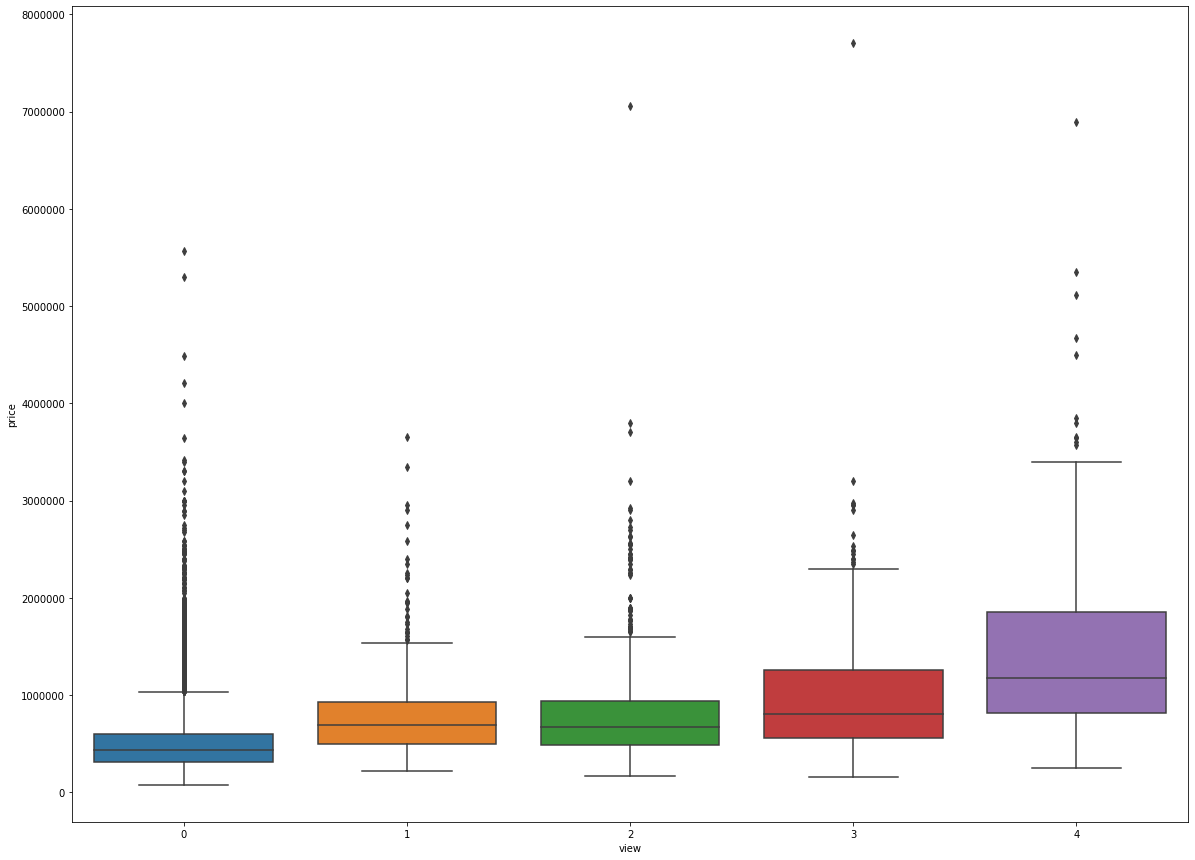

In [16]:
plt.figure(figsize=(20,15))
sns.boxplot(df.view,df.price)

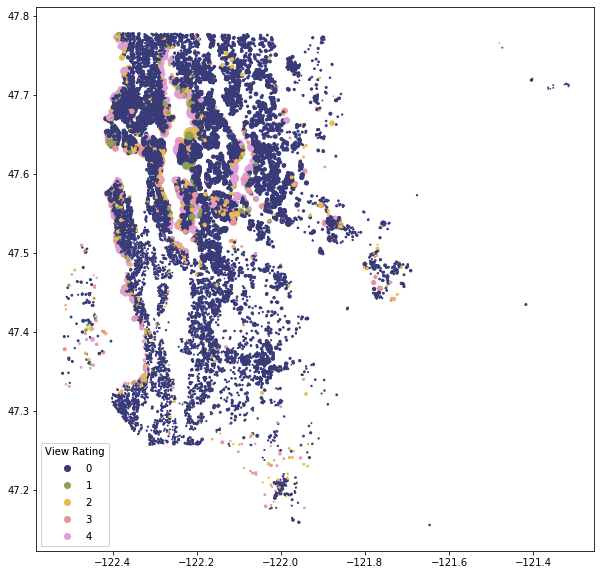

In [15]:
view = df.view
size = (np.sqrt(df.price**3/(10000000000000000)))
fig, ax = plt.subplots(figsize=(10,10))
scatter = plt.scatter(df.long,df.lat,c=view,s=size, cmap='tab20b')

legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="View Rating")
ax.add_artist(legend)
plt.savefig('views.png')
plt.show()

## for presentation, add map, clean up axis labels